<h2>Import bibliotek</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import fsum

<h2>Zadanie 2.</h2>

<h4>a) Suma z akumulatorem podwójnej precyzji</h4>

In [2]:
# sum numbers using a double precision float accumulator
def sum_double(nums):
    acc = np.double(0.0)
    for num in nums:
        acc += num
    return acc

<h4>b) Suma z akumulatorem pojedynczej precyzji</h4>

In [3]:
# sum numbers using a single precision float accumulator
def sum_single(nums):
    acc = np.single(0.0)
    for num in nums:
        acc += num
    return acc

<h4>c) Suma Kahana z akumulatorem pojedynczej precyzji</h4>

In [4]:
# sum numbers using a Kahan algorithm with single precisison float accumulator
def sum_kahan(nums):
    acc = np.single(0.0)
    err = np.single(0.0)
    for num in nums:
        y = num - err
        temp = acc + y
        err = (temp-acc) - y
        acc = temp
    return acc

<h4>d) Suma w porządku rosnącym</h4>

In [5]:
# sum numbers using a single precision float accumulator in an ascending order
def sum_asc(nums):
    acc = np.single(0.0)
    nums_sorted = sorted(nums)
    for num in nums_sorted:
        acc += num
    return acc

<h4>e) Suma w porządku malejącym</h4>

In [6]:
# sum numbers using a single precision float accumulator in a descending order
def sum_desc(nums):
    acc = np.single(0.0)
    nums_sorted = sorted(nums, reverse=True)
    for num in nums_sorted:
        acc += num
    return acc

<h4>Zdefiniowanie list liczb</h4>

In [7]:
# k exponents
ks = np.array([k for k in range(4,9)])
# n amounts of numbers
n_amounts = 10**ks
# lists of n uniformly random numbers
numbers = [np.single(np.random.uniform(0, 1, n)) for n in n_amounts]

<h4>Zdefiniowanie sum</h4>

In [8]:
# correct sum
sum_correct = np.array([fsum(nums) for nums in numbers])
# double precision float sum
sum_a = np.array([sum_double(nums) for nums in numbers])
# single precision float sum
sum_b = np.array([sum_single(nums) for nums in numbers])
# kahan sum
sum_c = np.array([sum_kahan(nums) for nums in numbers])
# ascending sum
sum_d = np.array([sum_asc(nums) for nums in numbers])
# descending sum
sum_e = np.array([sum_desc(nums) for nums in numbers])

<h4>Zdefiniowanie błędów względnych</h4>

In [9]:
# errors for sum a
err_a = np.abs(sum_correct - sum_a) / sum_correct
# errors for sum b
err_b = np.abs(sum_correct - sum_b) / sum_correct
# errors for sum c
err_c = np.abs(sum_correct - sum_c) / sum_correct
# errors for sum d
err_d = np.abs(sum_correct - sum_d) / sum_correct
# errors for sum e
err_e = np.abs(sum_correct - sum_e) / sum_correct

<h4>Wykres błędów względnych</h4>

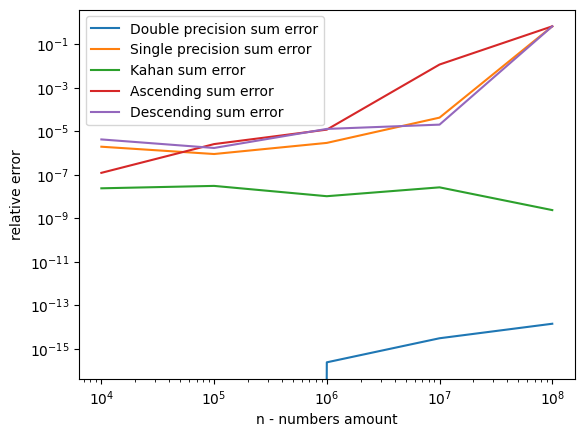

In [10]:
# set scales to logarithmic
plt.xscale("log")
plt.yscale("log")
# label axes
plt.xlabel("n - numbers amount")
plt.ylabel("relative error")
# plot relative errors
plt.plot(n_amounts, err_a, label="Double precision sum error")
plt.plot(n_amounts, err_b, label="Single precision sum error")
plt.plot(n_amounts, err_c, label="Kahan sum error")
plt.plot(n_amounts, err_d, label="Ascending sum error")
plt.plot(n_amounts, err_e, label="Descending sum error")
# show plot with legend
plt.legend()
plt.show()